In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('datasets/Week 3 diabetes_csv.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.drop(['BloodPressure', 'SkinThickness'], axis='columns', inplace=True)
df.dropna(inplace=True)

train_X = df['Glucose']
train_Y = df['Outcome']

In [30]:
def Accuracy(Y, Y_pred):
    Y, Y_pred = np.array(Y, dtype=np.int16), np.array(Y_pred, dtype=np.int16)
    correct = (Y == Y_pred).sum()
    return correct / len(Y)


In [21]:
class LinearRegressionPedhazur:
    def __init__(self):
        self.beta_0 = None
        self.beta_1 = None

    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)

        X_mean = np.mean(X)
        Y_mean = np.mean(Y)

        self.beta_1 = (np.sum((X - X_mean) * (Y - Y_mean))) / (np.sum((X - X_mean)**2))
        self.beta_0 = Y_mean - self.beta_1 * X_mean
    
    def predict(self, X):
        X = np.array(X)
        return self.beta_0 + self.beta_1 * X

In [22]:
class LinearRegressionCalculus:
    def __init__(self):
        self.beta_0 = None
        self.beta_1 = None

    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)

        n = len(X)
        sum_x = np.sum(X)
        sum_x2 = np.sum(X ** 2)

        sum_y = np.sum(Y)
        sum_xy = np.sum(X*Y)

        MAT1 = np.array([[n, sum_x],[sum_x, sum_x2]])
        MAT2 = np.array([[sum_y],[sum_xy]])

        inv_MAT1 = np.linalg.inv(MAT1)
        self.beta_0, self.beta_1 = (inv_MAT1 @ MAT2).flatten()
    def predict(self, X):
        X = np.array(X)
        return self.beta_0 + self.beta_1 * X

In [33]:
model1 = LinearRegressionPedhazur()
model1.fit(train_X, train_Y)
Y_pred = np.array(model1.predict(train_X) > 0.5, dtype=np.int16)

print(f'Coefficients for Pedhazur are ({model1.beta_0}, {model1.beta_1})')
print(f'Accuracy for Pedhazur is {Accuracy(train_Y, Y_pred)*100}%')


Coefficients for Pedhazur are (-0.49249489634012683, 0.006960225751927552)
Accuracy for Pedhazur is 74.73958333333334%


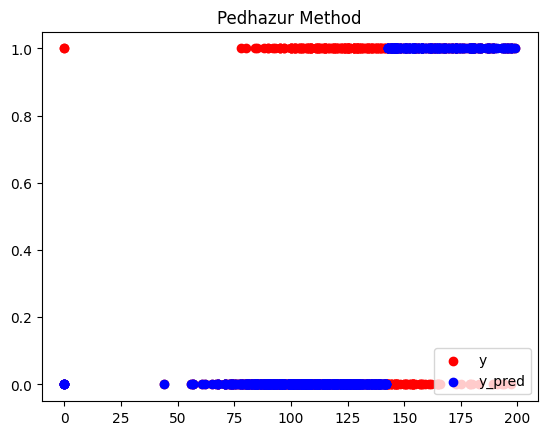

In [34]:
plt.scatter(train_X, train_Y, c='red', label='y')
plt.scatter(train_X, Y_pred, c='blue', label='y_pred')
plt.legend(loc='lower right')
plt.title('Pedhazur Method')
plt.show()

In [ ]:
model2 = LinearRegressionCalculus()
model2.fit(train_X, train_Y)
Y_pred = np.array(model2.predict(train_X) > 0.5, dtype=np.int16)

print(f'Coefficients for Calculus are ({model2.beta_0}, {model2.beta_1})')
print(f'Accuracy for Calculus is {Accuracy(train_Y, Y_pred)*100}%')

Coefficients for Pedhazur are (-0.49249489634012766, 0.006960225751927554)
Accuracy for Pedhazur is 74.73958333333334%


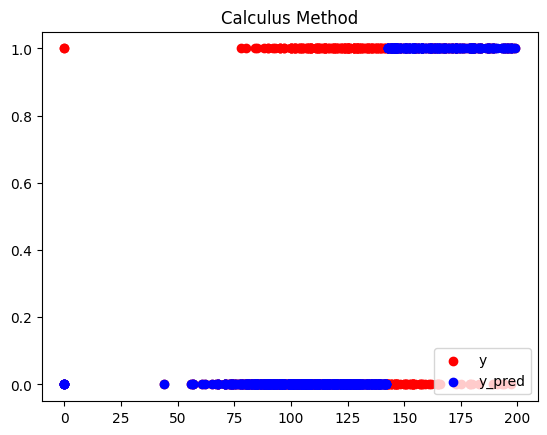

In [36]:
plt.scatter(train_X, train_Y, c='red', label='y')
plt.scatter(train_X, Y_pred, c='blue', label='y_pred')
plt.legend(loc='lower right')
plt.title('Calculus Method')
plt.show()